In [127]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

In [128]:
iris= load_iris()


In [129]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [130]:
data = pd.DataFrame(data=iris.data,columns= iris.feature_names)

In [131]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
data['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [133]:
data = data.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns')

In [134]:
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [135]:
#rename 
data = data.rename(columns={'petal length (cm)': "length"})
data = data.rename(columns={'petal width (cm)': "width"})

data.head()

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [136]:
data['target'] = iris.target
data.head()

,length,width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


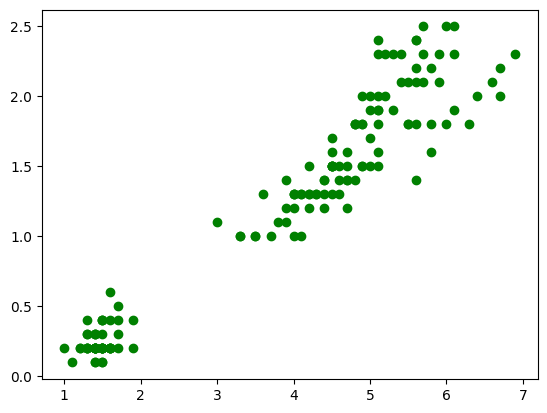

In [137]:
from matplotlib import pyplot as plt

plt.scatter(x= data.length,y= data.width,color="green")
plt.show()

In [138]:
# let cluster be 4

from sklearn.cluster import KMeans

km=KMeans(n_clusters= 4)

In [139]:
y_predicted = km.fit_predict(data)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2], dtype=int32)

In [140]:
#got our clusters
#place clusters

data['cluster'] = y_predicted
data.head()

,length,width,target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [141]:
#sepreate afilter acc to cluster  

data1= data[data['cluster'] == 0]
data2= data[data['cluster'] == 1]
data3= data[data['cluster'] == 2]
data4 = data[data['cluster'] == 3]

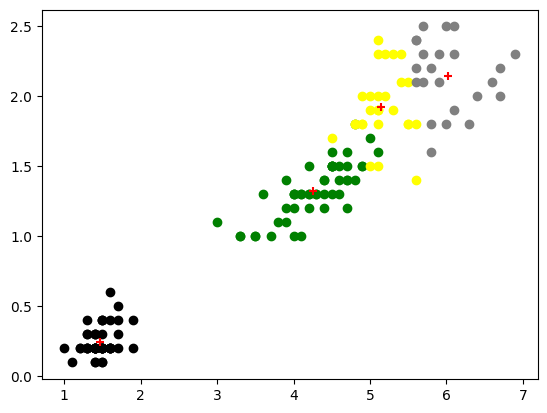

In [142]:
#plt scatter
plt.scatter(x=data1.length, y = data1.width,color="green")
plt.scatter(x=data2.length, y = data2.width,color="black")
plt.scatter(x=data3.length, y=data3.width, color="yellow")
plt.scatter(x=data4.length, y=data4.width, color="gray")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",label="centroid", marker="+")

In [143]:
range_k = range(1,10)
sse= []

for k in range_k:
    km = KMeans(n_clusters=k)
    km.fit(data[['length','width']])
    sse.append(km.inertia_)

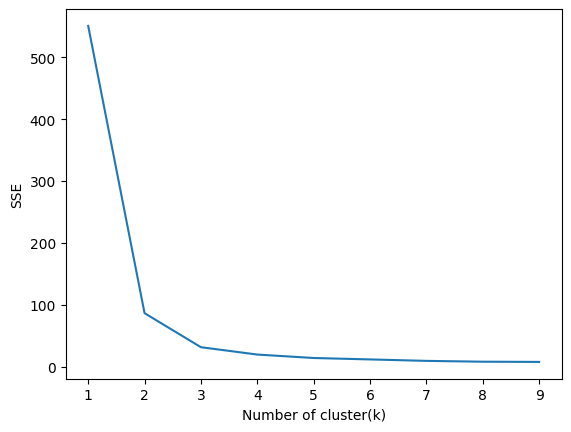

In [144]:
plt.xlabel("Number of cluster(k)")
plt.ylabel("SSE")
plt.plot(range_k,sse)




In [145]:
#predict do k=3

km = KMeans(n_clusters=3,random_state=42)
model = km.fit(data[['length','width']])




In [146]:
new_data = [[1.5,0.3]]
predicted =model.predict(new_data)
print("The given plant lies in {} cluster".format(predicted[0]))

The given plant lies in 1 cluster


c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [147]:
#use MinMaxScale Not necessary though for practise

from sklearn.preprocessing import MinMaxScaler

scaler_length = MinMaxScaler()
scaler_width = MinMaxScaler()

In [148]:
scaler_length = scaler_length.fit(data[['length']])
scaler_width= scaler_width.fit(data[['width']])


In [149]:
data['length'] = scaler_length.transform(data[['length']])
data['width'] = scaler_width.transform(data[['width']])

In [150]:
data

,length,width,target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


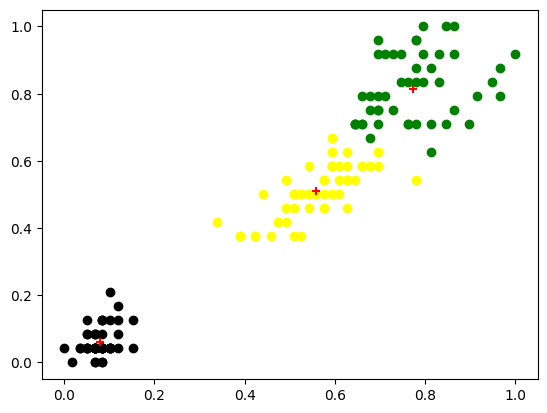

In [152]:
# sepreate afilter acc to cluster
#use Kmeans to train our scale
km =KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['length','width']])
data['cluster'] = y_predicted


data1 = data[data['cluster'] == 0]
data2 = data[data['cluster'] == 1]
data3 = data[data['cluster'] == 2]



#plt scatter
plt.scatter(x=data1.length, y = data1.width,color="green")
plt.scatter(x=data2.length, y = data2.width,color="black")
plt.scatter(x=data3.length, y=data3.width, color="yellow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",label="centroid", marker="+")